In [1]:
# Load a trained model and extract embeddings by feeding sequences through the net and saving the
# activations of the embedding layer.
import numpy as np
import pandas as pd
from keras import models
import pandas as pd
from keras import backend as K

BATCH_SIZE = 128
RUN_ID = '3'
MODEL_FILE = 'best.hdf5'
TIMESTEPS = 20
main_model_folder = 'saved_models'
import tensorflow as tf
model_path = ''
new_model = tf.keras.models.load_model(model_path)
embed_layer = [l for l in new_model.layers if l.name == 'embedding']

K.set_learning_phase(0)  # Set to test mode (vs. train; necessary for loading some models).

print('Loading model')
# Have to load structure and weights separately due to Keras issue (see #5916 on GitHub).
with open(f"{main_model_folder}/" + RUN_ID + '/model_structure.json') as ifile:
    autoencoder = models.model_from_json(ifile.read())
autoencoder.load_weights(f"{main_model_folder}/" + RUN_ID + '/' + MODEL_FILE)

embedding_layer = [l for l in autoencoder.layers if l.name == 'embedding'][0]
# This seems a strange way to make the encoder but it works great.
encoder = K.function(inputs=[autoencoder.layers[0].input], outputs=[embedding_layer.output])


df = pd.read_csv('testing_data_joined.csv')
s = df.shape
df_reshaped = df.values.reshape(s[0], s[1], 1)
predictions = encoder(df_reshaped)[0]
pr_shape = predictions.shape
predictions = predictions.reshape(pr_shape[0], pr_shape[1])


# Plotting


c:\Users\v.serapinaite\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Loading model


## Trying with target class

In [5]:
targ_df1 = pd.read_csv("datasets/EthanolLevel_target.csv")
test_df1 = pd.read_csv("datasets/EthanolLevel.csv")
targ_df2 = pd.read_csv("datasets/NonInvasiveFetalECGThorax2_target.csv")
test_df2 = pd.read_csv("datasets/NonInvasiveFetalECGThorax2.csv")

In [36]:
uniq_vals = targ_df2['target'].unique()
uniq_val_mapping = dict(zip(uniq_vals, np.arange(len(uniq_vals))))
targ_df2['target_mapped'] = targ_df2['target'].map(uniq_val_mapping)

In [10]:
test_df2 

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,-0.148820,0.230594,0.605512,0.913784,1.132855,1.247149,1.259416,1.179388,1.048647,0.896610,...,-1.248988,-1.373928,-1.510181,-1.644396,-1.749653,-1.792405,-1.781273,-1.695659,-1.395311,-1.007972
1,0.171595,0.566568,0.891072,1.097363,1.126303,1.070305,0.986665,0.881495,0.766628,0.642901,...,-1.268012,-1.408806,-1.569427,-1.701507,-1.749735,-1.680100,-1.484247,-1.168852,-0.784707,-0.403694
2,-0.679666,-0.575007,-0.405590,-0.217777,-0.167006,-0.238879,-0.266205,-0.235940,-0.163769,-0.093650,...,1.178124,1.155493,1.091656,0.915011,0.669561,0.413713,0.118456,-0.234365,-0.589987,-0.807440
3,0.258150,0.001045,-0.164143,-0.255280,-0.290210,-0.291122,-0.284053,-0.265537,-0.238620,-0.210251,...,1.602548,1.470918,1.306187,1.144129,1.004825,0.947369,0.955461,0.954075,0.857503,0.667850
4,0.170752,-0.007359,-0.187163,-0.352617,-0.469096,-0.524362,-0.529506,-0.482237,-0.407158,-0.324654,...,1.034875,1.044505,1.042826,1.018507,0.994444,0.999035,0.973026,0.875659,0.680017,0.410501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,2.034635,2.017562,1.880788,1.713594,1.559026,1.430357,1.321446,1.244636,1.250469,1.287025,...,0.193243,0.274831,0.313163,0.326262,0.326372,0.353128,0.498448,0.849191,1.342151,1.680401
1961,0.131814,0.054086,0.004729,-0.014130,-0.001126,0.039070,0.096114,0.140059,0.179254,0.219551,...,0.689827,0.716087,0.717450,0.697247,0.661001,0.600529,0.529757,0.470426,0.431212,0.382345
1962,0.307506,0.199075,0.111740,0.013994,-0.106949,-0.235997,-0.353533,-0.465755,-0.559235,-0.634295,...,0.678936,0.753487,0.841811,0.882529,0.881135,0.822573,0.708869,0.543711,0.313625,-0.003181
1963,1.750630,1.828651,1.758071,1.616005,1.475445,1.377422,1.311174,1.251309,1.219048,1.213521,...,-0.092263,0.039274,0.168800,0.315231,0.453334,0.578217,0.738696,1.015282,1.394098,1.627581


In [13]:
def splitting_data(df, take_time_stamps=50):
    vals = df.values
    vals_shape = vals.shape
    if vals_shape[1] >= take_time_stamps*2:
        el_l = [np.array([rows[j*take_time_stamps*(j+1)] for j in range(len(rows) // take_time_stamps-1)]) for rows in vals]
    elif vals_shape[1] < take_time_stamps*2 and vals_shape[1] >= take_time_stamps:
        el_l = [np.array([rows[j*take_time_stamps:take_time_stamps*(j+1)] for j in range(len(rows) // take_time_stamps)]) for rows in vals]
    else:
        print(f'WTF {vals_shape}')
    el_l = np.array(el_l)
    dims = el_l.shape
    a = el_l.reshape(dims[0] * dims[1], dims[2], 1)
    return a

In [16]:
test_df2.iloc[[0]]

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,-0.14882,0.230594,0.605512,0.913784,1.132855,1.247149,1.259416,1.179388,1.048647,0.89661,...,-1.248988,-1.373928,-1.510181,-1.644396,-1.749653,-1.792405,-1.781273,-1.695659,-1.395311,-1.007972


In [62]:
def splitting_data(df, take_time_stamps=50):
    vals = df.values
    vals_shape = vals.shape
    if vals_shape[1] >= take_time_stamps*2:
        el_l = [np.array([rows[j*take_time_stamps:take_time_stamps*(j+1)] for j in range(5)]) for rows in vals]
        
        
    elif vals_shape[1] < take_time_stamps*2 and vals_shape[1] >= take_time_stamps:
        el_l = [np.array([rows[j*take_time_stamps:take_time_stamps*(j+1)] for j in range(len(rows) // take_time_stamps)]) for rows in vals]
    else:
        print(f'WTF {vals_shape}')
    el_l = np.array(el_l)
    dims = el_l.shape
    #a = el_l.reshape(dims[0] * dims[1], dims[2], 1)
    return el_l

In [67]:
re = splitting_data(test_df2.iloc[[0]], take_time_stamps=128)
#re.shape
splitted_val_list = []
target_val_list = []
# Splitting data for embedding
for ind in range(len(test_df2)):
    splitted_val = np.array(splitting_data(test_df2.iloc[[ind]], take_time_stamps=128))
    splitted_val_list.append(splitted_val)

In [68]:
np.array(splitted_val_list).shape

(1965, 1, 5, 128)

In [75]:
splitted_val_arr = np.array(splitted_val_list).reshape(1965, 5, 128, 1)

In [82]:
## Getting embeddings:
predicted_embedding_list = []
target_class_list = []
for ind, val in enumerate(targ_df2['target_mapped'].values):
    predicted_embeddings = encoder(splitted_val_arr[ind])
    predicted_embedding_list.append(predicted_embeddings)
    target_class_list.append(np.array([val] * 5))
    

In [84]:
predicted_embedding_arr = np.array(predicted_embedding_list).reshape(1965*5, 32)

In [85]:
target_class_arr = np.array(target_class_list).reshape(1965*5)

In [86]:
print(predicted_embedding_arr.shape)
print(target_class_arr.shape)

(9825, 32)
(9825,)


In [144]:
from sklearn.model_selection import train_test_split

#X = check_df.iloc[:, :32].values
#y = check_df['labels'].values
X_train, X_test, y_train, y_test = train_test_split(predicted_embedding_list, target_class_list, test_size=0.2, random_state=42, shuffle=False)

In [145]:
X_train_reshaped = np.array(X_train).reshape(1572*5, 32)
X_test_reshaped = np.array(X_test).reshape(393*5, 32)
y_train_reshaped = np.array(y_train).reshape(1572*5)
y_test_reshaped = np.array(y_test).reshape(393*5)

In [146]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200)

clf.fit(X_train_reshaped, y_train_reshaped)

RandomForestClassifier(n_estimators=200)

In [147]:
pr_cl = clf.predict(X_test_reshaped)

In [148]:
clf.score(X_test_reshaped, y_test_reshaped)

0.5195928753180662

<AxesSubplot:>

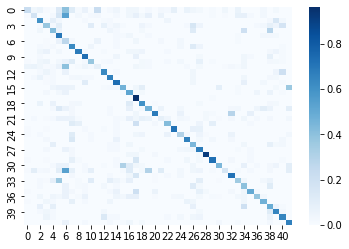

In [149]:
from sklearn.metrics import confusion_matrix, r2_score
import seaborn as sns
matrix = confusion_matrix(y_test_reshaped, pr_cl)
matrix.diagonal()/matrix.sum(axis=1)
sns.heatmap(matrix/np.sum(matrix, axis=1), 
            fmt='.2%', cmap='Blues')


In [150]:
acc = matrix.diagonal()/matrix.sum(axis=1)

for i, name in zip(acc, list(uniq_val_mapping.values())):
    #seen = 'True' if name in seen_data_labels else 'False'
    print(f'Class: {name} || Accuracy: {i*100} ')

Class: 0 || Accuracy: 22.666666666666664 
Class: 1 || Accuracy: 18.0 
Class: 2 || Accuracy: 60.0 
Class: 3 || Accuracy: 37.333333333333336 
Class: 4 || Accuracy: 42.22222222222222 
Class: 5 || Accuracy: 70.0 
Class: 6 || Accuracy: 26.666666666666668 
Class: 7 || Accuracy: 62.857142857142854 
Class: 8 || Accuracy: 68.33333333333333 
Class: 9 || Accuracy: 73.33333333333333 
Class: 10 || Accuracy: 37.77777777777778 
Class: 11 || Accuracy: 8.571428571428571 
Class: 12 || Accuracy: 63.07692307692307 
Class: 13 || Accuracy: 66.66666666666666 
Class: 14 || Accuracy: 73.33333333333333 
Class: 15 || Accuracy: 46.15384615384615 
Class: 16 || Accuracy: 52.0 
Class: 17 || Accuracy: 96.0 
Class: 18 || Accuracy: 60.0 
Class: 19 || Accuracy: 46.0 
Class: 20 || Accuracy: 68.57142857142857 
Class: 21 || Accuracy: 8.571428571428571 
Class: 22 || Accuracy: 42.22222222222222 
Class: 23 || Accuracy: 71.42857142857143 
Class: 24 || Accuracy: 30.0 
Class: 25 || Accuracy: 66.0 
Class: 26 || Accuracy: 44.0 
Cl

In [151]:
ss = np.array([1, 1, 0, 0, 3, 5, 9, 9, 9, 9])
np.bincount(ss).argmax()

9

In [152]:
X_test_not_shaped = np.array(X_test).reshape(393, 5, 32)

In [153]:
X_test_not_shaped.shape

(393, 5, 32)

In [154]:
list_of_predictions = []
list_of_target = []
for i in range(len(X_test_not_shaped)):
    samples = X_test_not_shaped[i]
    single_prediction = clf.predict(samples)
    most_common = np.bincount(ss).argmax()
    list_of_predictions.append(most_common)
    list_of_target.append(y_test[i][0])
    

<AxesSubplot:>

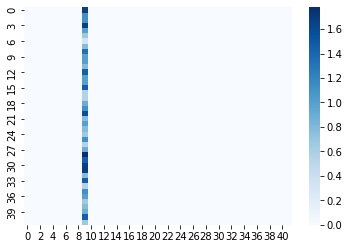

In [155]:
matrix = confusion_matrix(list_of_target, list_of_predictions)
matrix.diagonal()/matrix.sum(axis=1)
sns.heatmap(matrix/np.sum(matrix, axis=1), 
            fmt='.2%', cmap='Blues')

In [156]:
r2_score(list_of_target, list_of_predictions)

-0.851347312108905

In [142]:
# vX_train, X_test, y_train, y_test = train_test_split(predicted_embedding_list, target_class_list, test_size=0.2, random_state=42, shuffle=True)
average_embedding_values_list = []
np.array(predicted_embedding_list).shape
for i in np.array(predicted_embedding_list).reshape(1965, 5, 32):
    average_embedding_values_list.append(i.mean(axis=0))

In [141]:
target_values = targ_df2['target_mapped'].values

In [157]:
X_train, X_test, y_train, y_test = train_test_split(average_embedding_values_list, target_values, test_size=0.2, random_state=42, shuffle=True)

In [158]:
clf = RandomForestClassifier(n_estimators=200)

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [159]:
pr_cl = clf.predict(X_test)

In [160]:
clf.score(X_test, y_test)

0.7760814249363868

In [161]:
r2_score(y_test, pr_cl)

0.6123709476829358

<AxesSubplot:>

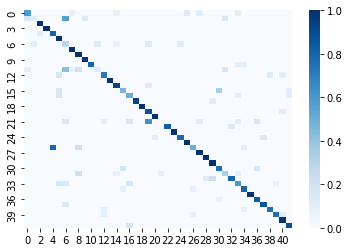

In [163]:
from sklearn.metrics import confusion_matrix, r2_score
import seaborn as sns
matrix = confusion_matrix(y_test, pr_cl)
matrix.diagonal()/matrix.sum(axis=1)
sns.heatmap(matrix/np.sum(matrix, axis=1), 
            fmt='.2%', cmap='Blues')


In [91]:
np.array(y_train).shape

(1572, 5)

In [103]:
from collections import Counter

Counter(y_test_reshaped)

Counter({22: 55,
         41: 45,
         33: 50,
         17: 75,
         23: 65,
         40: 45,
         14: 65,
         4: 25,
         32: 75,
         10: 50,
         19: 40,
         0: 60,
         12: 55,
         36: 30,
         15: 55,
         11: 40,
         13: 50,
         31: 30,
         30: 60,
         38: 40,
         21: 55,
         39: 60,
         5: 30,
         16: 30,
         7: 60,
         37: 35,
         35: 30,
         20: 50,
         2: 50,
         9: 35,
         27: 45,
         24: 45,
         6: 35,
         28: 40,
         25: 40,
         1: 45,
         18: 45,
         3: 45,
         26: 60,
         34: 50,
         8: 25,
         29: 45})

In [103]:
#!pip install scikit-learn
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_predictions = pca.fit_transform(predictions)

In [104]:
testing_names_df = pd.read_csv('testing_names.csv')

testing_names_df.head(2)

,Unnamed: 0,names,partial_data_names
0,0,GesturePebbleZ2.csv,1
1,1,GesturePebbleZ2.csv,1


In [105]:

pca_df = pd.DataFrame(pca_predictions, columns=['at1', 'at2'])

pca_df['names'] = testing_names_df['names']
pca_df['partial_data_names'] = testing_names_df['partial_data_names']

In [106]:
pca_df.head(5)

,at1,at2,names,partial_data_names
0,-0.968120,0.807117,GesturePebbleZ2.csv,1
1,-0.150070,-0.402234,GesturePebbleZ2.csv,1
2,-0.897669,1.036831,GesturePebbleZ2.csv,1
3,-0.127153,-0.356452,GesturePebbleZ2.csv,1
4,-1.193301,0.487503,GesturePebbleZ2.csv,1


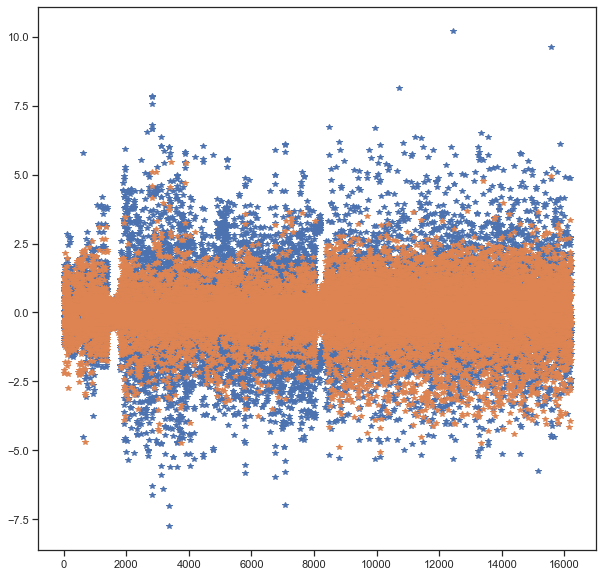

In [107]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(pca_predictions, "*")


Mixed test sets


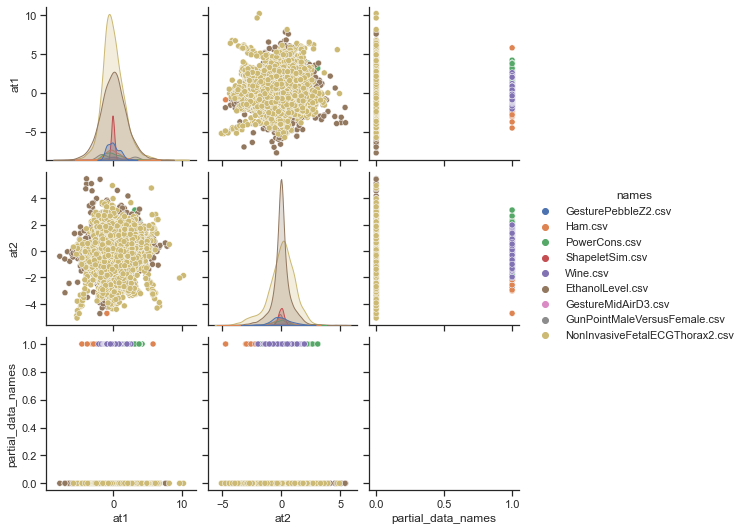

In [108]:
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

print("Mixed test sets")
sns.set_theme(style="ticks")
#f, ax = plt.subplots(1, 1, figsize=(15, 15))
#df = sns.load_dataset("penguins")
sns.pairplot(pca_df, hue="names")
#f.set_title("Mixed test data")


Unseen test sets


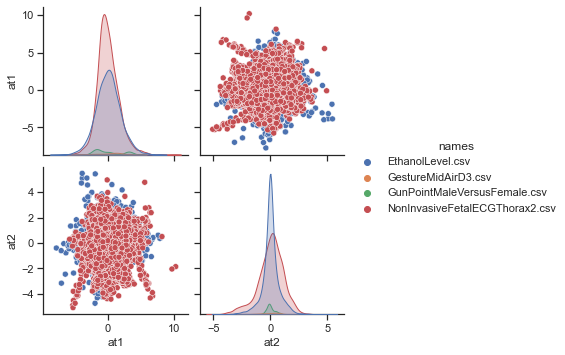

In [109]:
pca_df_unseen = pca_df[pca_df['partial_data_names'] == 0].drop(labels='partial_data_names', axis=1)
print("Unseen test sets")
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.pairplot(pca_df_unseen, hue="names")


Seen test sets


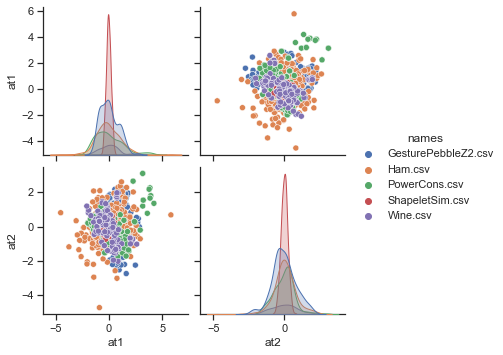

In [110]:
pca_df_seen = pca_df[pca_df['partial_data_names'] == 1].drop(labels='partial_data_names', axis=1)
print("Seen test sets")
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.pairplot(pca_df_seen, hue="names")


In [111]:
partial_data_names_vals = testing_names_df['partial_data_names'].values
unseen_predictions = predictions[partial_data_names_vals == 0]

In [112]:
# separate PCA
pca1 = PCA(n_components=2)

pca_predictions1 = pca1.fit_transform(unseen_predictions)
pca_df_unseen = pd.DataFrame(pca_predictions1, columns=['at1', 'at2'])

pca_df_unseen['names'] = testing_names_df[testing_names_df['partial_data_names']==0]['names']


Unseen test sets, separate unseen PCA


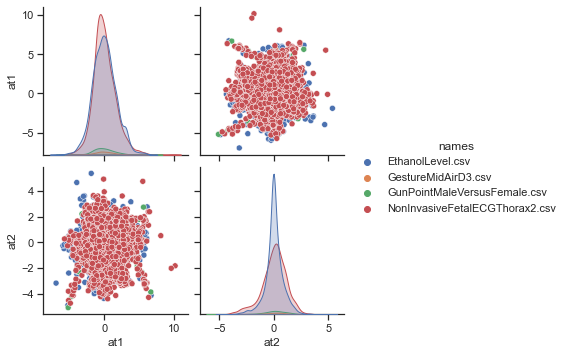

In [113]:
print("Unseen test sets, separate unseen PCA")
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.pairplot(pca_df_unseen, hue="names")


# TSNE

In [114]:
from sklearn.manifold import TSNE
import numpy as np

np.random.seed(42)
tsne = TSNE(n_components=2)
tsne_res = tsne.fit_transform(predictions)

c:\Users\v.serapinaite\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\v.serapinaite\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [115]:
tsne_df = pd.DataFrame(tsne_res, columns=['at1', 'at2'])

tsne_df['names'] = testing_names_df['names']
tsne_df['partial_data_names'] = testing_names_df['partial_data_names']

TSNE: Mixed test sets


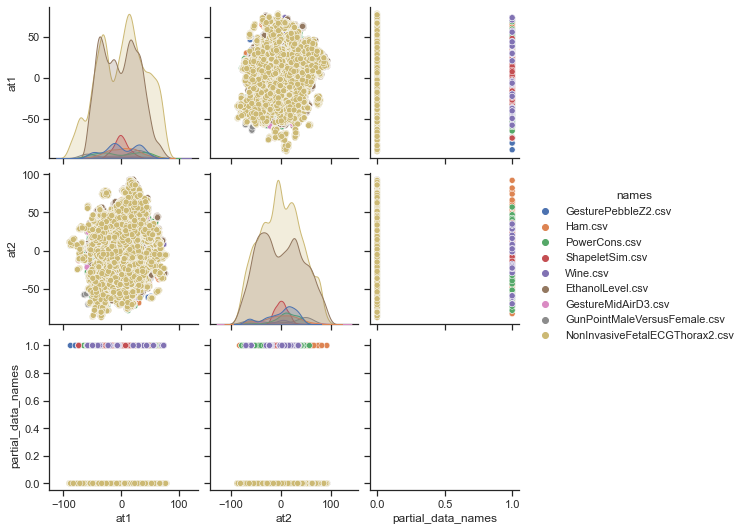

In [116]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

print("TSNE: Mixed test sets")
sns.set_theme(style="ticks")
#f, ax = plt.subplots(1, 1, figsize=(15, 15))
#df = sns.load_dataset("penguins")
sns.pairplot(tsne_df, hue="names")
#f.set_title("Mixed test data")


TSNE: Unseen test sets


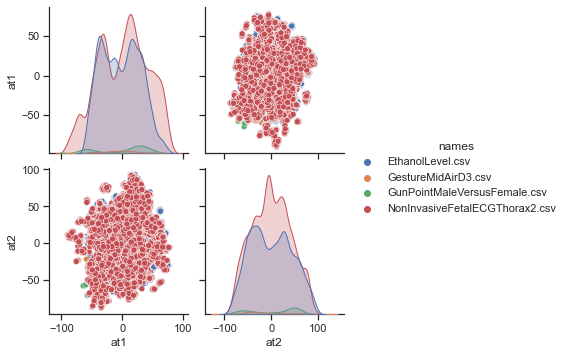

In [117]:
tsne_df_unseen = tsne_df[tsne_df['partial_data_names'] == 0].drop(labels='partial_data_names', axis=1)
print("TSNE: Unseen test sets")
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.pairplot(tsne_df_unseen, hue="names")


TSNE: Seen test sets


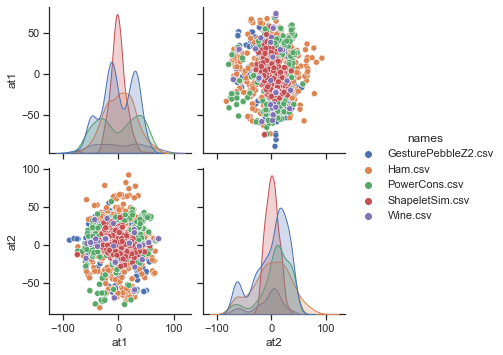

In [118]:
tsne_df_seen = tsne_df[tsne_df['partial_data_names'] == 1].drop(labels='partial_data_names', axis=1)
print("TSNE: Seen test sets")
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.pairplot(tsne_df_seen, hue="names")


In [119]:
# separate PCA
tsne1 = TSNE(n_components=2)
tsne_res1 = tsne1.fit_transform(unseen_predictions)

tsne_df_unseen = pd.DataFrame(tsne_res1, columns=['at1', 'at2'])

tsne_df_unseen['names'] = testing_names_df[testing_names_df['partial_data_names']==0]['names']


c:\Users\v.serapinaite\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\v.serapinaite\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Unseen test sets, separate unseen TSNE


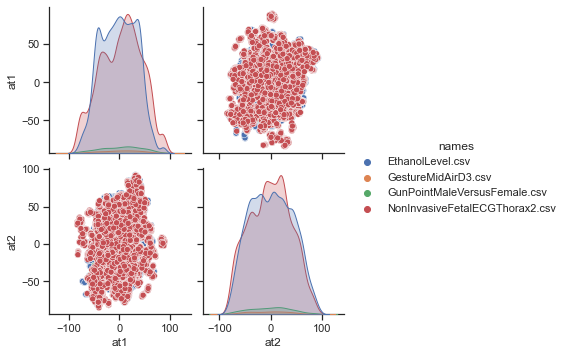

In [120]:
print("Unseen test sets, separate unseen TSNE")
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.pairplot(tsne_df_unseen, hue="names")


# training classifier to see if model can recognize datasets

In [121]:
# training classifier 
check_df = pd.DataFrame(predictions)
check_df['label_names'] = testing_names_df['names']
check_df['partial_data_names'] = testing_names_df['partial_data_names']
check_df['labels'] = check_df['label_names'].map(uniq_val_dict)


In [122]:
uniq_vals = check_df['label_names'].unique()
uniq_val_dict = dict(zip(uniq_vals, range(len(uniq_vals))))

In [123]:
uniq_val_dict

{'GesturePebbleZ2.csv': 0,
 'Ham.csv': 1,
 'PowerCons.csv': 2,
 'ShapeletSim.csv': 3,
 'Wine.csv': 4,
 'EthanolLevel.csv': 5,
 'GestureMidAirD3.csv': 6,
 'GunPointMaleVersusFemale.csv': 7,
 'NonInvasiveFetalECGThorax2.csv': 8}

In [124]:
check_df.iloc[:, :32].head(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.281432,0.275237,0.327221,0.079180,-0.162147,-0.257850,0.041172,0.061893,0.012989,0.183505,...,0.327224,0.343411,0.328073,0.341063,0.392831,0.389354,0.423729,0.442090,0.526518,0.507179
1,0.318116,0.518834,0.624279,0.104171,-0.025059,-0.011273,-0.011273,-0.011273,-0.011273,-0.011273,...,-0.011273,-0.011273,-0.011273,-0.011273,-0.011273,-0.011273,-0.011273,-0.011273,-0.011273,-0.024497


In [125]:
from sklearn.model_selection import train_test_split

X = check_df.iloc[:, :32].values
y = check_df['labels'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [126]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
clf.score(X_test, y_test)

0.8501387604070305

In [128]:
pr_cl = clf.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, pr_cl)
matrix.diagonal()/matrix.sum(axis=1)

array([0.59090909, 0.18181818, 0.80645161, 0.325     , 0.5       ,
       0.8645054 , 0.2       , 1.        , 0.92682927])

<AxesSubplot:>

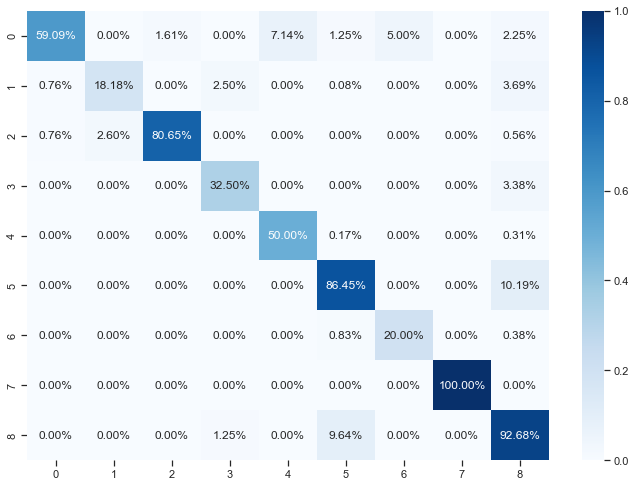

In [130]:
sns.heatmap(matrix/np.sum(matrix, axis=1), annot=True, 
            fmt='.2%', cmap='Blues')


In [131]:
acc = matrix.diagonal()/matrix.sum(axis=1)
seen_data_labels = check_df[check_df['partial_data_names'] == 1]['label_names'].unique()

for i, name in zip(acc, uniq_vals):
    seen = 'True' if name in seen_data_labels else 'False'
    print(f'accuracy: {i*100} | dataset name: {name} | dataset is partially seen {seen}')
    


accuracy: 59.09090909090909 | dataset name: GesturePebbleZ2.csv | dataset is partially seen True
accuracy: 18.181818181818183 | dataset name: Ham.csv | dataset is partially seen True
accuracy: 80.64516129032258 | dataset name: PowerCons.csv | dataset is partially seen True
accuracy: 32.5 | dataset name: ShapeletSim.csv | dataset is partially seen True
accuracy: 50.0 | dataset name: Wine.csv | dataset is partially seen True
accuracy: 86.45054031587698 | dataset name: EthanolLevel.csv | dataset is partially seen False
accuracy: 20.0 | dataset name: GestureMidAirD3.csv | dataset is partially seen False
accuracy: 100.0 | dataset name: GunPointMaleVersusFemale.csv | dataset is partially seen False
accuracy: 92.6829268292683 | dataset name: NonInvasiveFetalECGThorax2.csv | dataset is partially seen False


In [132]:
matrix

array([[  78,    0,    1,    0,    1,   15,    1,    0,   36],
       [   1,   14,    0,    2,    0,    1,    0,    0,   59],
       [   1,    2,   50,    0,    0,    0,    0,    0,    9],
       [   0,    0,    0,   26,    0,    0,    0,    0,   54],
       [   0,    0,    0,    0,    7,    2,    0,    0,    5],
       [   0,    0,    0,    0,    0, 1040,    0,    0,  163],
       [   0,    0,    0,    0,    0,   10,    4,    0,    6],
       [   0,    0,    0,    0,    0,    0,    0,   56,    0],
       [   0,    0,    0,    1,    0,  116,    0,    0, 1482]],
      dtype=int64)

In [133]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test, pr_cl, target_names=uniq_vals, digits=4))

                                precision    recall  f1-score   support

           GesturePebbleZ2.csv     0.9750    0.5909    0.7358       132
                       Ham.csv     0.8750    0.1818    0.3011        77
                 PowerCons.csv     0.9804    0.8065    0.8850        62
               ShapeletSim.csv     0.8966    0.3250    0.4771        80
                      Wine.csv     0.8750    0.5000    0.6364        14
              EthanolLevel.csv     0.8784    0.8645    0.8714      1203
           GestureMidAirD3.csv     0.8000    0.2000    0.3200        20
  GunPointMaleVersusFemale.csv     1.0000    1.0000    1.0000        56
NonInvasiveFetalECGThorax2.csv     0.8170    0.9268    0.8684      1599

                      accuracy                         0.8501      3243
                     macro avg     0.8997    0.5995    0.6772      3243
                  weighted avg     0.8560    0.8501    0.8392      3243



In [134]:
check_df['label_names'].value_counts()

NonInvasiveFetalECGThorax2.csv    7860
EthanolLevel.csv                  6000
GesturePebbleZ2.csv                608
Ham.csv                            428
ShapeletSim.csv                    400
PowerCons.csv                      360
GunPointMaleVersusFemale.csv       316
GestureMidAirD3.csv                130
Wine.csv                           111
Name: label_names, dtype: int64

# Testing accuracy for each dataset separately

# PROBLEM: sample target data too::::